# Tri par sélection

## Principe

Sur un tableau de n éléments (numérotés de 0 à N-1), le tri par sélection 

* recherche le plus petit élément du tableau, et l'échange avec l'élément d'indice 0 
* recherche le second plus petit élément du tableau, et l'échange avec l'élément d'indice 1 
* continue ainsi jusqu'à l'avant dernier élément d'indice N-2. Le tableau est alors entièrement trié.

## Boucle interne

Le coeur de l'algorithme consiste à trouver l'indice de l'élément le plus petit dans la partie du tableau pas encore triée, par exemple à partir de l'élément d'indice p. Ecrivons cette fonction

In [1]:
def plus_petit_element(T,p):
    N = len(T)
    iMin = p
    for i in range(p+1,N):
        if T[i] < T[iMin]:
            iMin = i
    return iMin

Testons la sur en cherchant depuis le début (position 0)

In [2]:
T = [ 5, 8, 4, 3, 2, 1, 7, 6 ]
iMin = plus_petit_element(T,0)
print("Plus petit élément: T [",iMin,"] =",T[iMin])

Plus petit élément: T [ 5 ] = 1


## Echange 

Une fois le plus petit élément trouvé on veut le placer en tête de tableau (de la partie du tableau qui reste à trier) 

Mais ... il faut conserver la valeur qui était en tête 

Donc ... on échange les éléments en tête et minimum.

In [3]:
T[iMin],T[0] = T[0],T[iMin]   # swap
print(T[:1],T[1:])            # T[:1] est la partie triée

[1] [8, 4, 3, 2, 5, 7, 6]


Le premier élément est donc en place mais le reste du tableau, d'indices 1 à N-1, reste à trier. Répétons l'opération pour l'indice 1

In [4]:
iMin = plus_petit_element(T,1)
T[iMin],T[1] = T[1],T[iMin]   
print(T[:2],T[2:])            

[1, 2] [4, 3, 8, 5, 7, 6]


Pour l'indice 2

In [5]:
iMin = plus_petit_element(T,2); T[iMin],T[2] = T[2],T[iMin]; 
print(T[:3],T[3:])            

[1, 2, 3] [4, 8, 5, 7, 6]


Pour les indices 3 à 7

In [6]:
iMin = plus_petit_element(T,3); T[iMin],T[3] = T[3],T[iMin]; 
print(T[:4],T[4:])            

[1, 2, 3, 4] [8, 5, 7, 6]


In [7]:
iMin = plus_petit_element(T,4); T[iMin],T[4] = T[4],T[iMin]; 
print(T[:5],T[5:])            

[1, 2, 3, 4, 5] [8, 7, 6]


In [8]:
iMin = plus_petit_element(T,5); T[iMin],T[5] = T[5],T[iMin]; 
print(T[:6],T[6:])            

[1, 2, 3, 4, 5, 6] [7, 8]


In [9]:
iMin = plus_petit_element(T,6); T[iMin],T[6] = T[6],T[iMin]; 
print(T[:7],T[7:])            

[1, 2, 3, 4, 5, 6, 7] [8]


## Boucle externe

Il faut répéter recherche du minimum et échange pour toutes les positions de 0 à N-2.

Il n'est pas nécessaire de le faire pour l'indice N-1: un tableau de 1 élément est toujours trié. 

In [10]:
T = [ 5, 8, 4, 3, 2, 1, 7, 6 ]
N = len(T)

for i in range(0,N-1):
    iMin = plus_petit_element(T,i)
    T[iMin],T[i] = T[i],T[iMin]   # swap
    print(T[:i+1],T[i+1:])        # T[:i+1] est la partie triée

[1] [8, 4, 3, 2, 5, 7, 6]
[1, 2] [4, 3, 8, 5, 7, 6]
[1, 2, 3] [4, 8, 5, 7, 6]
[1, 2, 3, 4] [8, 5, 7, 6]
[1, 2, 3, 4, 5] [8, 7, 6]
[1, 2, 3, 4, 5, 6] [7, 8]
[1, 2, 3, 4, 5, 6, 7] [8]


## En résumé

Le tri par sélection effectue deux boucles imbiquées. 

* La boucle interne recherche l'élément le plus petit dans la partie du tableau par encore triée.
* La boucle externe échange cet élément avec celui en tête de la partie du tableau non trié. 

*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'échange sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [11]:
import include.helpers as asd1

In [12]:
def tri_par_selection(T,comparer = asd1.plus_petit):
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            if comparer(T[j],T[jMin]):
                jMin = j
        asd1.echanger(T,i,jMin)

In [13]:
T = [ 5, 8, 4, 3, 2, 1, 7, 6 ]
tri_par_selection(T); print(T)

[1, 2, 3, 4, 5, 6, 7, 8]


## Complexité

Pour évaluer la complexité de cet algorithme, trions un tableau au contenu généré aléatoirement

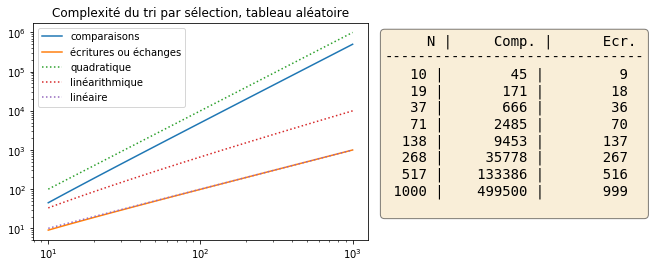

In [14]:
asd1.evalue_complexite(tri_par_selection, 
                       asd1.tableau_aleatoire, 
                       "tri par sélection, tableau aléatoire")

Nous voyons que le nombre de comparaisons a une **complexité quadratique en $\Theta(n^2)$** pour trier $n$ éléments. 

Pour être plus précis, il y a exactement $n(n-1)/2$ comparaisons, comme pour le tri à bulles. 

Par contre, le nombre d'échanges évolue avec une complexité linéaire $\Theta(n)$

Plus précisément, il y a $n-1$ échanges.

A la lecture de l'algorithme, ces nombres de comparaisons et d'échanges sont évidemment **indépendants du contenu du tableau** à trier. Il n'est dès lors par nécessaire d'effectuer d'autres tests.

## Stabilité

Le tri par sélection n'est **pas stable**. 

L'échange `T[jMin],T[i] = T[i],T[jMin]` déplace l'élément `T[i]` à une position arbitraire du tableau sans tenir compte de sa valeur, éventuellement au delà d'un élément égal. 


Le tri n'est pas stable


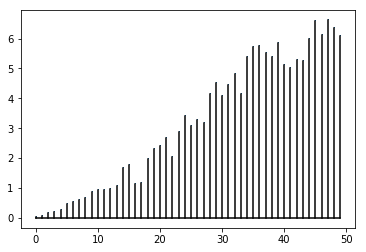

In [15]:
asd1.test_stabilite(tri_par_selection)

# Visualisation

Finalement, visualisons graphiquement le tri de 20 entiers aléatoires entre 0 et 100

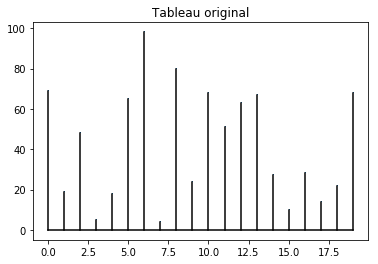

In [16]:
import numpy as np
T = np.random.randint(0,100,20)
asd1.afficheIteration(T,'Tableau original')

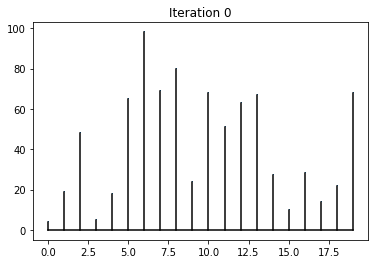

In [17]:
i = 0
iMin = plus_petit_element(T,i)
T[iMin],T[i] = T[i],T[iMin]
asd1.afficheIteration(T,'Iteration {0}'.format(i))

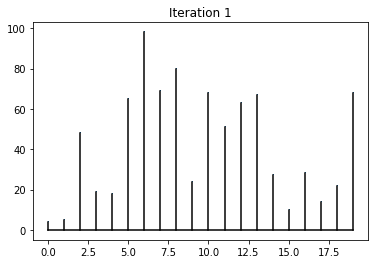

In [18]:
i += 1
iMin = plus_petit_element(T,i)
T[iMin],T[i] = T[i],T[iMin]
asd1.afficheIteration(T,'Iteration {0}'.format(i))

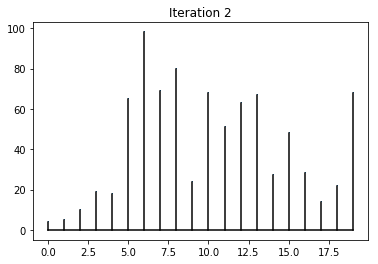

In [19]:
i += 1
iMin = plus_petit_element(T,i)
T[iMin],T[i] = T[i],T[iMin]
asd1.afficheIteration(T,'Iteration {0}'.format(i))

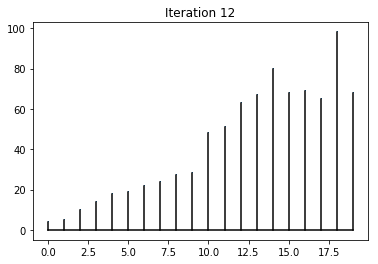

In [20]:
for k in range(10):
    i += 1
    iMin = plus_petit_element(T,i)
    T[iMin],T[i] = T[i],T[iMin]
asd1.afficheIteration(T,'Iteration {0}'.format(i))

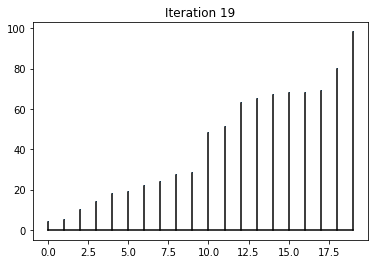

In [21]:
while i < len(T)-1:
    i += 1
    iMin = plus_petit_element(T,i)
    T[iMin],T[i] = T[i],T[iMin]
asd1.afficheIteration(T,'Iteration {0}'.format(i))

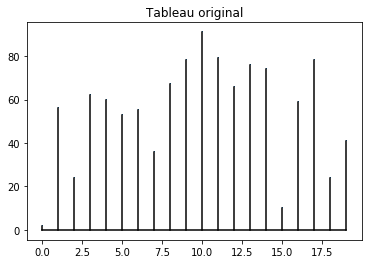

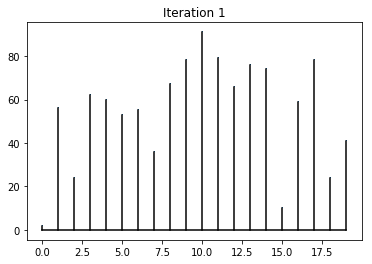

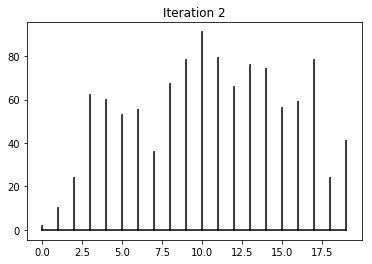

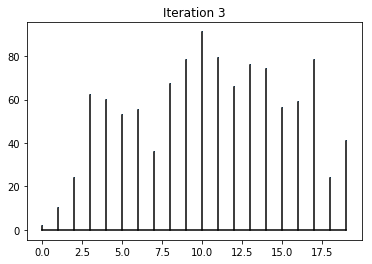

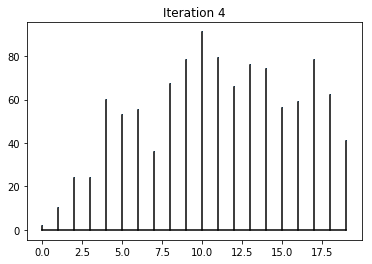

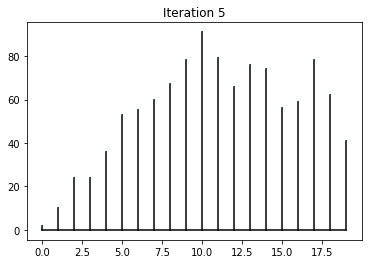

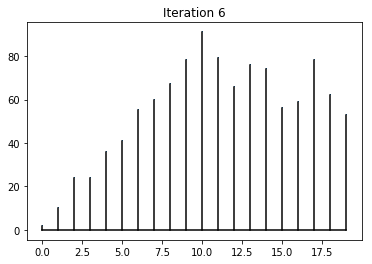

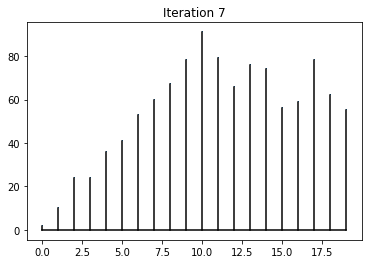

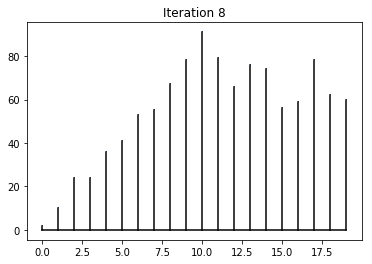

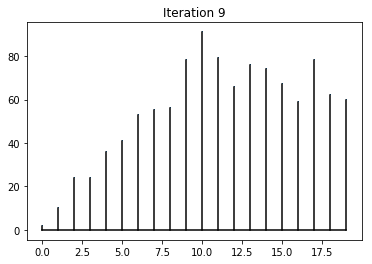

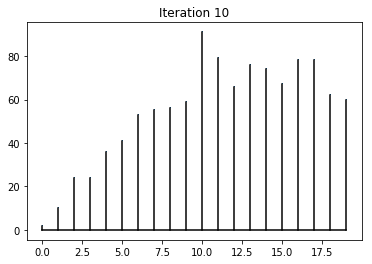

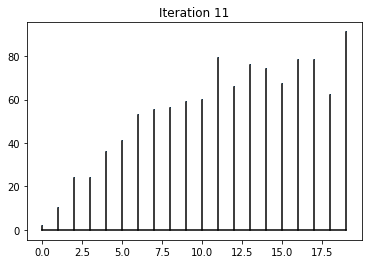

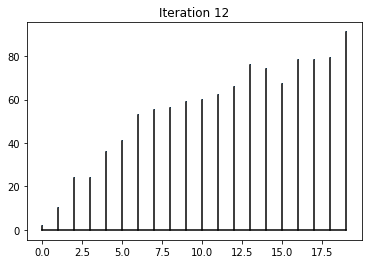

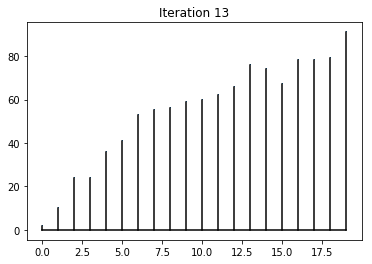

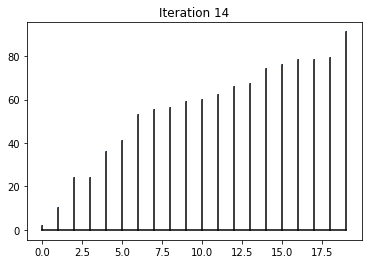

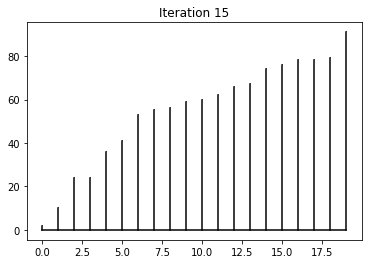

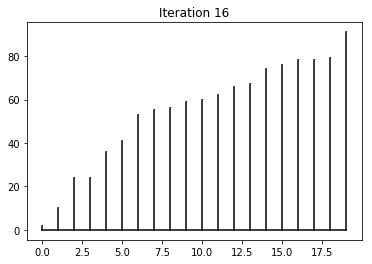

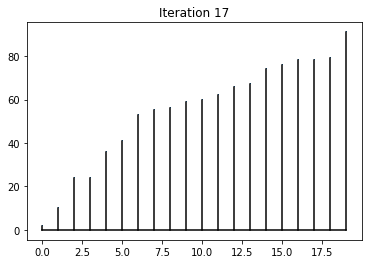

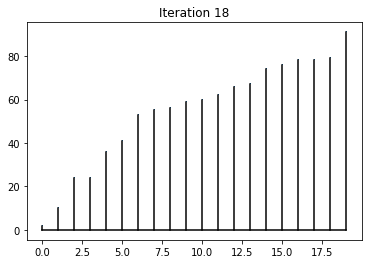

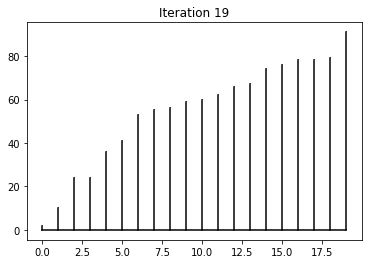

In [22]:
# on peut aussi tout visualiser en une fois

asd1.visualisation_tri_par_selection()

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>